In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [50]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [53]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data Exploration</h1>

In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [54]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Fill up Null Values</h1>

In [55]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])

In [56]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])

In [57]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [58]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

In [59]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [60]:
accident['Road_Type'] = accident['Road_Type'].fillna('unknown')
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Data Types</h1>

In [61]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [62]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')

In [63]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'] , dayfirst = True, errors = 'coerce')

In [64]:
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')

In [65]:
accident['District Area'] = accident['District Area'].astype('category')

In [66]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('object')

In [67]:
accident['Road_Type'] = accident['Road_Type'].astype('object')

In [68]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')

In [69]:
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [70]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area              category
Weather_Conditions                 object
Vehicle_Type                     category
dtype: object

In [71]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown,Urban,unaccounted,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown,Urban,unaccounted,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Extracting Date Information using Pandas Date Time</h1>

In [72]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

<h1>Univariate</h1>

<h1>Question</h1>
<h2>What Road  Surface Conditions accident happened in the dry condition in year?</h2>

In [73]:
accident['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [74]:
RSC = accident.groupby(['Road_Surface_Conditions', 'Year']).size().unstack(fill_value=0)
RSC

Year,2019.0,2020.0,2021.0,2022.0
Road_Surface_Conditions,,,,
Dry,52802,43767,42698,39032
Flood over 3cm. deep,102,178,96,32
Frost or ice,845,2309,2543,3493
Snow,268,370,966,1303
Wet or damp,17850,23539,19869,12945


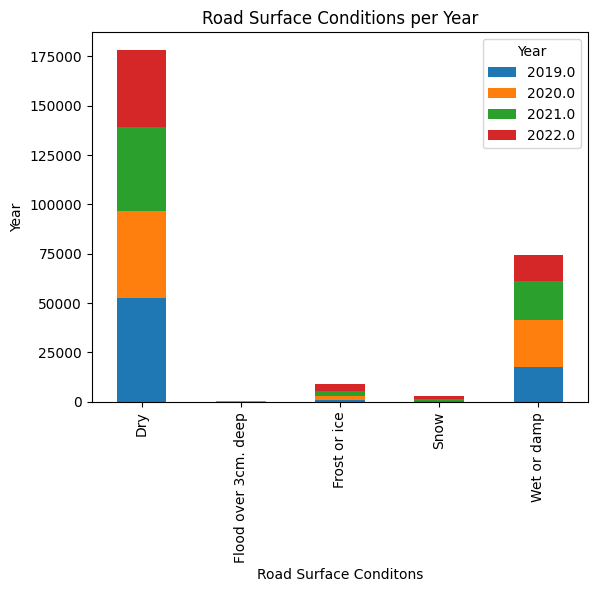

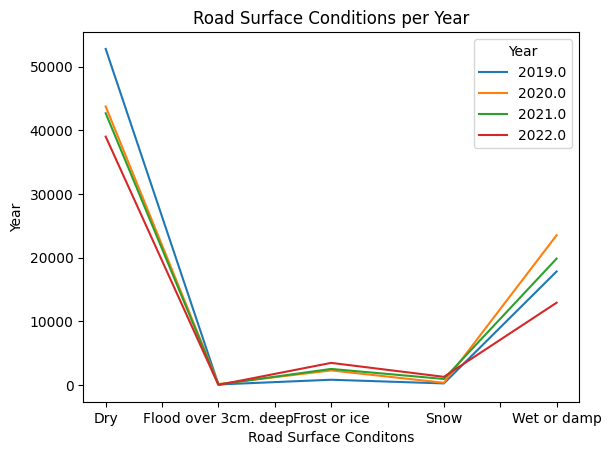

In [120]:
RSC.plot(kind='bar', stacked=True)
plt.title('Road Surface Conditions per Year')
plt.xlabel('Road Surface Conditons')
plt.ylabel('Year')
plt.show()

RSC.plot()
plt.title('Road Surface Conditions per Year')
plt.xlabel('Road Surface Conditons')
plt.ylabel('Year')
plt.show()

<h1>Insight no.1</h1>
<h2>In the Road Surface Conditions we can see that dry has 67% of the total accident happened in that year 2019</h2>

In [114]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [116]:
AS = accident.groupby(['Accident_Severity', 'Year']).size().unstack(fill_value=0)
AS

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\2821706160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AS = accident.groupby(['Accident_Severity', 'Year']).size().unstack(fill_value=0)


Year,2019.0,2020.0,2021.0,2022.0
Accident_Severity,,,,
Fatal,1116,942,823,623
Serious,9823,9346,8858,7266
Slight,60928,59875,56491,48916


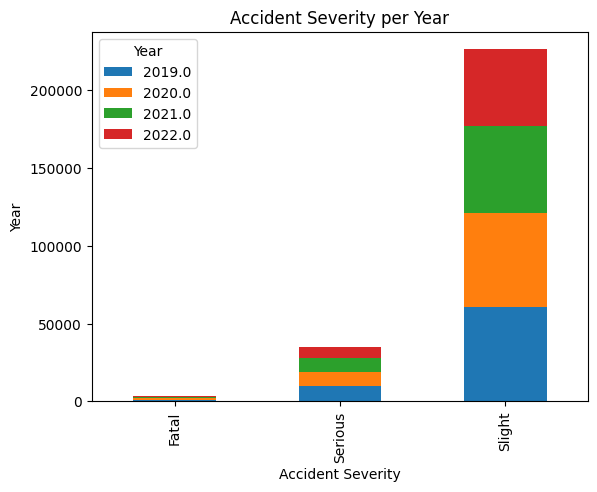

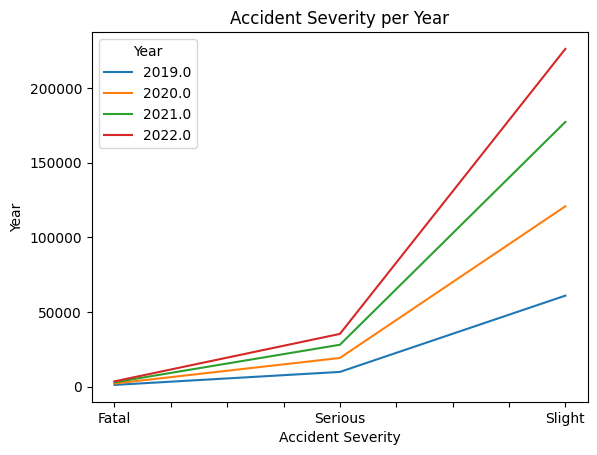

In [121]:
AS.plot(kind='bar', stacked=True)
plt.title('Accident Severity per Year')
plt.xlabel('Accident Severity')
plt.ylabel('Year')
plt.show()

AS.plot(kind='line', stacked=True)
plt.title('Accident Severity per Year')
plt.xlabel('Accident Severity')
plt.ylabel('Year')
plt.show()

<h1>Insight no.2</h1>
<h2>The highest is the slight injury so there is 85% in th Accident Severity</h2>

<h1>Highest accident in the Weather Conditions</h1>

In [77]:
accident['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [126]:
wc = accident.groupby(['Weather_Conditions', 'Year']).size().unstack(fill_value=0)
wc

Year,2019.0,2020.0,2021.0,2022.0
Weather_Conditions,,,,
Fine + high winds,1172,1237,722,519
Fine no high winds,58345,52827,51163,45558
Fog or mist,245,327,398,282
Other,1373,2052,2060,1918
Raining + high winds,1395,1411,818,651
Raining no high winds,7326,10126,8528,5380
Snowing + high winds,27,102,134,157
Snowing no high winds,349,460,1005,1274
unaccounted,1635,1621,1344,1066


<h1>Insight no.3</h1>
<h2>Fine no high winds is the highest number of accident happened in the year 2019</h2>

<h1>Year 2019 to 2022</h1>

In [78]:
NMC = accident.groupby(['Number_of_Casualties', 'Year']).size().unstack(fill_value=0)
NMC

Year,2019.0,2020.0,2021.0,2022.0
Number_of_Casualties,,,,
1,54699,53696,50648,43564
2,11916,11442,10694,9141
3,3349,3285,3125,2597
4,1195,1061,1065,958
5,442,403,385,320
6,158,156,155,129
7,51,68,45,49
8,20,20,21,20
9,17,14,10,5


<h1>Insight no.4</h1>
<h2>There is 75% of accident happened in the dry road conditions year 2019</h2>

<h1>What district area has the most accident</h1>

In [80]:
accident['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h1>Insight no.5</h1>
<h2>There is 32% of accident happened in the district area of birmingham</h2>

In [111]:
nc = accident.groupby(["Accident_Severity", "Number_of_Casualties"]).size().unstack(fill_value=0)
nc

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\2456606378.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nc = accident.groupby(["Accident_Severity", "Number_of_Casualties"]).size().unstack(fill_value=0)


Number_of_Casualties,1,2,3,4,5,6,7,8,9,10,...,29,32,40,42,43,45,47,48,62,68
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
Fatal,4843,2005,886,452,240,122,54,17,13,7,...,0,0,1,1,0,0,0,1,1,1
Serious,64271,14495,5266,2357,1037,459,157,68,33,17,...,2,0,0,1,0,1,0,0,0,0
Slight,434927,91471,24624,8347,2846,944,328,129,66,34,...,1,1,1,0,1,0,1,0,0,0


<h1>Insight no.6</h1>
<h2>There is 76% number of vehicles that accident happened</h2>

<h1>Question</h1>
<h2>What Weather Conditions that accident happened?</h2>

In [82]:
accident['Weather_Conditions'].mode()

0    Fine no high winds
Name: Weather_Conditions, dtype: object

<h1>Insight no.7</h1>
<h2>In the Weather Conditions, fine no high winds is the conditions that happened</h2>

<h1>Bivariate</h1>

<h1>Question</h1>
<h2>What is the relationship between the accident severity to the weather conditions that happened from that accident</h2>

In [83]:
AW = accident.groupby(["Accident_Severity", "Weather_Conditions"]).size().unstack(fill_value=0)
AW

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\761520951.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AW = accident.groupby(["Accident_Severity", "Weather_Conditions"]).size().unstack(fill_value=0)


Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,unaccounted
Accident_Severity,,,,,,,,,
Fatal,175,7100,82,165,145,848,3,36,107
Serious,1245,72046,483,1801,1261,9468,109,565,1239
Slight,7134,441739,2963,15184,8209,69380,773,5637,12782


<h1>Insight no.8</h1>
<h2>A high proportion of severe accidents during foggy conditions, even if the absolute number is low, is still significant</h2>

<h1>Question</h1>
<h2>What Type of Vehicle in the Road Surface Conditions on the accident</h2>

In [110]:
vt = accident.groupby(["Vehicle_Type", "Number_of_Vehicles"]).size().unstack(fill_value=0)
vt

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\4264947362.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vt = accident.groupby(["Vehicle_Type", "Number_of_Vehicles"]).size().unstack(fill_value=0)


Number_of_Vehicles,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,28,32
Vehicle_Type,,,,,,,,,,,,,,,,,,,
Agricultural vehicle,613,1152,145,27,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0
Bus or coach (17 or more pass seats),7874,15351,2051,451,103,25,11,5,4,2,0,1,0,0,0,0,0,0,0
Car,151251,295262,40066,8539,1873,569,232,115,38,15,9,5,4,9,1,2,0,1,1
Data missing or out of range,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Goods 7.5 tonnes mgw and over,5250,10297,1361,291,72,22,9,4,0,1,0,0,0,0,0,0,0,0,0
Goods over 3.5t. and under 7.5t,1861,3624,467,112,13,9,4,1,1,1,0,0,2,0,0,0,1,0,0
Minibus (8 - 16 passenger seats),636,1148,152,29,7,2,2,0,0,0,0,0,0,0,0,0,0,0,0
Motorcycle 125cc and under,4744,9075,1116,255,47,14,10,6,2,0,0,0,0,0,0,0,0,0,0
Motorcycle 50cc and under,2286,4511,614,147,35,5,1,1,2,1,0,0,0,0,0,0,0,0,0


<h1>Insight no.9</h1>
<h2>There has a different type of vehicle that the most of it in the road surface conditions highest are the dry </h2>

<h1>Question</h1>
<h2>What are the locations with the highest concentration of accidents?</h2>

In [109]:
LL = accident.groupby(["Longitude", "Year"]).size().unstack(fill_value=0)
LL

Year,2019.0,2020.0,2021.0,2022.0
Longitude,,,,
-7.516225,0,0,0,1
-7.515933,1,0,0,0
-7.498973,0,0,0,1
-7.485126,0,1,0,0
-7.465609,0,0,1,0
...,...,...,...,...
1.756307,1,0,0,0
1.757915,0,0,1,0
1.758190,0,0,0,1


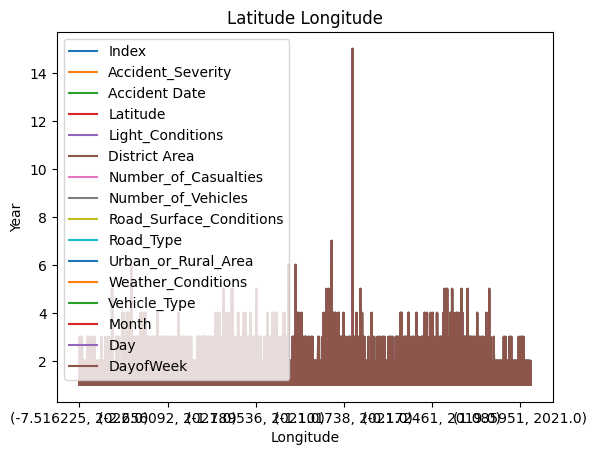

In [107]:
LL.plot(kind='line')
plt.title('Latitude Longitude')
plt.xlabel('Longitude')
plt.ylabel('Year')
plt.show()

<h1>Insight no.10</h1>
<h2>There is 12% of location in Year 20222 of the Longitude</h2>

<h1>Question</h1>
<h2>What is the distribution of accident frequency across different months of the year</h2>

In [92]:
MPY = accident.groupby(["Accident_Severity", "Year"]).size().unstack(fill_value=0)
MPY

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\2987083879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MPY = accident.groupby(["Accident_Severity", "Year"]).size().unstack(fill_value=0)


Year,2019.0,2020.0,2021.0,2022.0
Accident_Severity,,,,
Fatal,1116,942,823,623
Serious,9823,9346,8858,7266
Slight,60928,59875,56491,48916


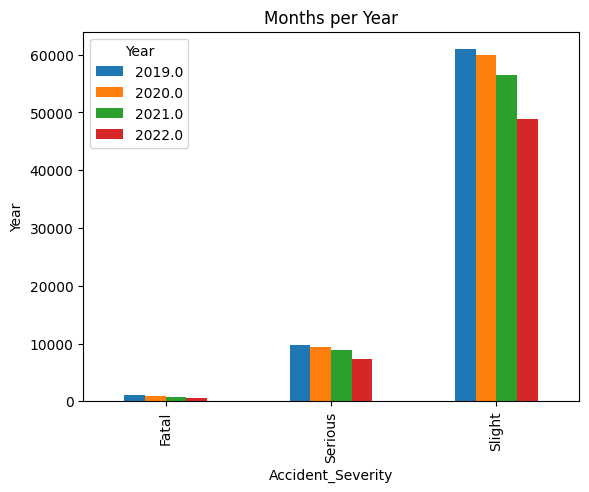

In [93]:
MPY.plot(kind='bar')
plt.title('Months per Year')
plt.xlabel('Accident_Severity')
plt.ylabel('Year')
plt.show()

<h1>Insight no.11</h1>
<h2>Look for months with unusually high or low accident counts compared to the average for that month across other years.</h2>

<h1>Question</h1>
<h2>Is there a significant difference in accident frequency between light conditions in all year?</h2>

In [94]:
LC = accident.groupby(["Light_Conditions", "Year"]).size().unstack(fill_value=0)
LC

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\558821400.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LC = accident.groupby(["Light_Conditions", "Year"]).size().unstack(fill_value=0)


Year,2019.0,2020.0,2021.0,2022.0
Light_Conditions,,,,
Darkness - lighting unknown,719,717,643,511
Darkness - lights lit,14124,13467,13298,10653
Darkness - lights unlit,264,289,263,203
Darkness - no lighting,4242,4085,3756,2802
Daylight,52518,51605,48212,42636


<h1>Insight no.12</h1>
<h2>In a light condition experience higher incident happened in year 2019 and it's daylight, leading to a greater number of accidents, though often less severe. This suggests that might have a higher overall accident frequency, but the severity might be lower due to lower speeds</h2>

<h1>Question</h1>
<h2>How does accident frequency change across different light conditions, controlling for weather?</h2>

In [101]:
lc_wc = accident.groupby(['Weather_Conditions'])['Light_Conditions'].value_counts()
lc_wc

Weather_Conditions     Light_Conditions           
Fine + high winds      Daylight                         5796
                       Darkness - lights lit            1852
                       Darkness - no lighting            796
                       Darkness - lighting unknown        59
                       Darkness - lights unlit            51
Fine no high winds     Daylight                       398684
                       Darkness - lights lit           91951
                       Darkness - no lighting          24867
                       Darkness - lighting unknown      3683
                       Darkness - lights unlit          1700
Fog or mist            Daylight                         1643
                       Darkness - lights lit             921
                       Darkness - no lighting            862
                       Darkness - lighting unknown        65
                       Darkness - lights unlit            37
Other                  Daylight   

In [ ]:
lc_wc.plot(kind='scatterplot')
plt.title('Months per Year')
plt.xlabel('Accident_Severity')
plt.ylabel('Year')
plt.show()

<h1>Insight no.13</h1>
<h2>If the relative risk of an accident at night compared to daytime is consistently higher across various weather conditions, it strongly suggests that poor lighting is a significant independent factor influencing accident frequency.</h2>

<h1>Question</h1>
<h2>Which combination of road type and surface conditions leads to the most serious accidents? </h2>

In [42]:
accident_agg = accident.groupby(["Accident_Severity", "Road_Type", "Road_Surface_Conditions"]).count()
accident_agg

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\1518896825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_agg = accident.groupby(["Accident_Severity", "Road_Type", "Road_Surface_Conditions"]).count()


Index  \
Accident_Severity Road_Type        Road_Surface_Conditions          
Fatal             Dual carriageway Dry                       1217   
                                   Flood over 3cm. deep         5   
                                   Frost or ice                36   
                                   Snow                         6   
                                   Wet or damp                551   
...                                                           ...   
Slight            unknown          Dry                       3053   
                                   Flood over 3cm. deep         6   
                                   Frost or ice                78   
                                   Snow                        26   
                                   Wet or damp                843   

                                                            Accident Date  \
Accident_Severity Road_Type        Road_Surface_Conditions                  
Fatal             Dual carriageway Dry                                508   
                                   Flood over 3cm. deep                 0   
                                   Frost or ice                        17   
                                   Snow                                 4   
                                   Wet or damp                        204   
...                                                                   ...   
Slight            unknown          Dry                               1212   
                                   Flood over 3cm. deep                 4   
                                   Frost or ice                        40   
                                   Snow                                13   
                                   Wet or damp                        342   

                                                            Latitude  \
Accident_Severity Road_Type        Road_Surface_Conditions             
Fatal             Dual carriageway Dry                          1217   
                                   Flood over 3cm. deep            5   
                                   Frost or ice                   36   
                                   Snow                            6   
                                   Wet or damp                   551   
...                                                              ...   
Slight            unknown          Dry                          3053   
                                   Flood over 3cm. deep            6   
                                   Frost or ice                   78   
                                   Snow                           26   
                                   Wet or damp                   843   

                                                            Light_Conditions  \
Accident_Severity Road_Type        Road_Surface_Conditions                     
Fatal             Dual carriageway Dry                                  1217   
                                   Flood over 3cm. deep                    5   
                                   Frost or ice                           36   
                                   Snow                                    6   
                                   Wet or damp                           551   
...                                                                      ...   
Slight            unknown          Dry                                  3053   
                                   Flood over 3cm. deep                    6   
                                   Frost or ice                           78   
                                   Snow                                   26   
                                   Wet or damp                           843   

                                                            District Area  \
Accident_Severity Road_Type        Road_Surface_Conditions                  
Fatal             Dual carri

<h1>Insight no.14</h1>
<h2>We can see those accident severity whose the highest in like fatal or slight and serious accident happened in that conditions</h2>

<h1>Question</h1>
<h2>How do combinations of weather, light, and road surface conditions influence the frequency of accidents?</h2>

In [43]:
accident_agg = accident.groupby(["Weather_Conditions", "Light_Conditions", "Road_Surface_Conditions"]).count()
accident_agg

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\2149681864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_agg = accident.groupby(["Weather_Conditions", "Light_Conditions", "Road_Surface_Conditions"]).count()


Index  \
Weather_Conditions Light_Conditions            Road_Surface_Conditions          
Fine + high winds  Darkness - lighting unknown Dry                         29   
                                               Flood over 3cm. deep         2   
                                               Frost or ice                 3   
                                               Snow                         0   
                                               Wet or damp                 25   
...                                                                       ...   
unaccounted        Daylight                    Dry                       8687   
                                               Flood over 3cm. deep        12   
                                               Frost or ice               112   
                                               Snow                        32   
                                               Wet or damp               1199   

                                                                        Accident_Severity  \
Weather_Conditions Light_Conditions            Road_Surface_Conditions                      
Fine + high winds  Darkness - lighting unknown Dry                                     29   
                                               Flood over 3cm. deep                     2   
                                               Frost or ice                             3   
                                               Snow                                     0   
                                               Wet or damp                             25   
...                                                                                   ...   
unaccounted        Daylight                    Dry                                   8687   
                                               Flood over 3cm. deep                    12   
                                               Frost or ice                           112   
                                               Snow                                    32   
                                               Wet or damp                           1199   

                                                                        Accident Date  \
Weather_Conditions Light_Conditions            Road_Surface_Conditions                  
Fine + high winds  Darkness - lighting unknown Dry                                 11   
                                               Flood over 3cm. deep                 1   
                                               Frost or ice                         2   
                                               Snow                                 0   
                                               Wet or damp                         10   
...                                                                               ...   
unaccounted        Daylight                    Dry                               3499   
                                               Flood over 3cm. deep                 3   
                                               Frost or ice                        61   
                                               Snow                                17   
                                               Wet or damp                        474   

                                                                        Latitude  \
Weather_Conditions Light_Conditions            Road_Surface_Conditions             
Fine + high winds  Darkness - lighting unknown Dry                            29   
                                               Flood over 3cm. deep            2   
                                               Frost or ice                    3   
                                               Snow                            0   
                                               Wet or damp                    25   
...                                                           

<h1>Insight no.15</h1>
<h2>A higher accident count under certain conditions might simply reflect more driving under those conditions.</h2>

<h1>Question</h1>
<h2>How does the frequency of accidents vary across different vehicle types, district areas, and days of the year?</h2>

In [44]:
accident_agg = accident.groupby(["Vehicle_Type", "District Area", "Accident Date"]).count()
accident_agg

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\2806377164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_agg = accident.groupby(["Vehicle_Type", "District Area", "Accident Date"]).count()


Index  \
Vehicle_Type                        District Area Accident Date          
Agricultural vehicle                Aberdeen City 2019-01-01         0   
                                                  2019-01-02         0   
                                                  2019-01-03         0   
                                                  2019-01-04         0   
                                                  2019-01-05         0   
...                                                                ...   
Van / Goods 3.5 tonnes mgw or under York          2022-12-08         0   
                                                  2022-12-09         0   
                                                  2022-12-10         0   
                                                  2022-12-11         0   
                                                  2022-12-12         0   

                                                                 Accident_Severity  \
Vehicle_Type                        District Area Accident Date                      
Agricultural vehicle                Aberdeen City 2019-01-01                     0   
                                                  2019-01-02                     0   
                                                  2019-01-03                     0   
                                                  2019-01-04                     0   
                                                  2019-01-05                     0   
...                                                                            ...   
Van / Goods 3.5 tonnes mgw or under York          2022-12-08                     0   
                                                  2022-12-09                     0   
                                                  2022-12-10                     0   
                                                  2022-12-11                     0   
                                                  2022-12-12                     0   

                                                                 Latitude  \
Vehicle_Type                        District Area Accident Date             
Agricultural vehicle                Aberdeen City 2019-01-01            0   
                                                  2019-01-02            0   
                                                  2019-01-03            0   
                                                  2019-01-04            0   
                                                  2019-01-05            0   
...                                                                   ...   
Van / Goods 3.5 tonnes mgw or under York          2022-12-08            0   
                                                  2022-12-09            0   
                                                  2022-12-10            0   
                                                  2022-12-11            0   
                                                  2022-12-12            0   

                                                                 Light_Conditions  \
Vehicle_Type                        District Area Accident Date                     
Agricultural vehicle                Aberdeen City 2019-01-01                    0   
                                                  2019-01-02                    0   
                                                  2019-01-03                    0   
                                                  2019-01-04                    0   
                                                  2019-01-05                    0   
...                                                                           ...   
Van / Goods 3.5 tonnes mgw or under York          2022-12-08                    0   
                                                  2022-12-09                    0   
                                                  2022-12-10                    0   
                                              

<h1>Insight no.16</h1>
<h2>It represent all the data in the district area of every year and when its the accident happened</h2>

<h1>Question</h1>
<h2>How might this analysis be used to inform strategies for accident prevention?</h2>

In [45]:
accident_agg = accident.groupby(["Accident Date", "Light_Conditions", "Urban_or_Rural_Area"]).count()
accident_agg

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\1325029859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_agg = accident.groupby(["Accident Date", "Light_Conditions", "Urban_or_Rural_Area"]).count()


Index  \
Accident Date Light_Conditions            Urban_or_Rural_Area          
2019-01-01    Darkness - lighting unknown Rural                    3   
                                          Unallocated              0   
                                          Urban                    4   
              Darkness - lights lit       Rural                   37   
                                          Unallocated              0   
...                                                              ...   
2022-12-12    Darkness - no lighting      Unallocated              0   
                                          Urban                    0   
              Daylight                    Rural                   72   
                                          Unallocated              0   
                                          Urban                   91   

                                                               Accident_Severity  \
Accident Date Light_Conditions            Urban_or_Rural_Area                      
2019-01-01    Darkness - lighting unknown Rural                                3   
                                          Unallocated                          0   
                                          Urban                                4   
              Darkness - lights lit       Rural                               37   
                                          Unallocated                          0   
...                                                                          ...   
2022-12-12    Darkness - no lighting      Unallocated                          0   
                                          Urban                                0   
              Daylight                    Rural                               72   
                                          Unallocated                          0   
                                          Urban                               91   

                                                               Latitude  \
Accident Date Light_Conditions            Urban_or_Rural_Area             
2019-01-01    Darkness - lighting unknown Rural                       3   
                                          Unallocated                 0   
                                          Urban                       4   
              Darkness - lights lit       Rural                      37   
                                          Unallocated                 0   
...                                                                 ...   
2022-12-12    Darkness - no lighting      Unallocated                 0   
                                          Urban                       0   
              Daylight                    Rural                      72   
                                          Unallocated                 0   
                                          Urban                      91   

                                                               District Area  \
Accident Date Light_Conditions            Urban_or_Rural_Area                  
2019-01-01    Darkness - lighting unknown Rural                            3   
                                          Unallocated                      0   
                                          Urban                            4   
              Darkness - lights lit       Rural                           37   
                                          Unallocated                      0   
...                                                                      ...   
2022-12-12    Darkness - no lighting      Unallocated                      0   
                                          Urban                            0   
              Daylight                    Rural                           72   
                                          Unallocated                      0   
                                          Urban                           91   

                

<h1>Insight no.17</h1>
<h2>The analysis might highlight the need for infrastructure improvements such as better road signage, improved pedestrian crossings, or the addition of roundabouts at accident-prone locations.</h2>

<h1>Question</h1>
<h2>Are there particular combinations of vehicle type, road type, and road surface conditions that consistently lead to a higher frequency of accidents?</h2>

In [46]:
accident_agg = accident.groupby(["Vehicle_Type", "Road_Type", "Road_Surface_Conditions"]).count()
accident_agg

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\990559380.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_agg = accident.groupby(["Vehicle_Type", "Road_Type", "Road_Surface_Conditions"]).count()


Index  \
Vehicle_Type                        Road_Type        Road_Surface_Conditions          
Agricultural vehicle                Dual carriageway Dry                        201   
                                                     Flood over 3cm. deep         1   
                                                     Frost or ice                 9   
                                                     Snow                         5   
                                                     Wet or damp                 77   
...                                                                             ...   
Van / Goods 3.5 tonnes mgw or under unknown          Dry                        167   
                                                     Flood over 3cm. deep         0   
                                                     Frost or ice                 7   
                                                     Snow                         0   
                                                     Wet or damp                 41   

                                                                              Accident_Severity  \
Vehicle_Type                        Road_Type        Road_Surface_Conditions                      
Agricultural vehicle                Dual carriageway Dry                                    201   
                                                     Flood over 3cm. deep                     1   
                                                     Frost or ice                             9   
                                                     Snow                                     5   
                                                     Wet or damp                             77   
...                                                                                         ...   
Van / Goods 3.5 tonnes mgw or under unknown          Dry                                    167   
                                                     Flood over 3cm. deep                     0   
                                                     Frost or ice                             7   
                                                     Snow                                     0   
                                                     Wet or damp                             41   

                                                                              Accident Date  \
Vehicle_Type                        Road_Type        Road_Surface_Conditions                  
Agricultural vehicle                Dual carriageway Dry                                 82   
                                                     Flood over 3cm. deep                 0   
                                                     Frost or ice                         5   
                                                     Snow                                 2   
                                                     Wet or damp                         33   
...                                                                                     ...   
Van / Goods 3.5 tonnes mgw or under unknown          Dry                                 75   
                                                     Flood over 3cm. deep                 0   
                                                     Frost or ice                         2   
                                                     Snow                                 0   
                                                     Wet or damp                         21   

                                                                              Latitude  \
Vehicle_Type                        Road_Type        Road_Surface_Conditions             
Agricultural vehicle                Dual carriageway Dry                           201   
                                                     Flood over 3cm. deep            1   
                                                     Frost or 

<h1>Insight no.18</h1>
<h2>The combinations of vehicle type, road type, and road surface conditions that pose the greatest risk, enabling targeted safety interventions.</h2>

<h1>Question</h1>
<h2>How do trends in the relationship between the number of vehicles involved and the number of casualties evolve over time, and are there specific temporal patterns that influence these relationships?</h2>

In [47]:
accident_agg = accident.groupby(["Accident Date", "Number_of_Vehicles", "Number_of_Casualties"]).count()
accident_agg

Index  \
Accident Date Number_of_Vehicles Number_of_Casualties          
2019-01-01    1                  1                       131   
                                 2                        23   
                                 3                         7   
                                 4                         2   
                                 5                         1   
...                                                      ...   
2022-12-12    4                  1                         3   
                                 2                         1   
                                 6                         1   
              5                  1                         2   
              8                  3                         1   

                                                       Accident_Severity  \
Accident Date Number_of_Vehicles Number_of_Casualties                      
2019-01-01    1                  1                                   131   
                                 2                                    23   
                                 3                                     7   
                                 4                                     2   
                                 5                                     1   
...                                                                  ...   
2022-12-12    4                  1                                     3   
                                 2                                     1   
                                 6                                     1   
              5                  1                                     2   
              8                  3                                     1   

                                                       Latitude  \
Accident Date Number_of_Vehicles Number_of_Casualties             
2019-01-01    1                  1                          131   
                                 2                           23   
                                 3                            7   
                                 4                            2   
                                 5                            1   
...                                                         ...   
2022-12-12    4                  1                            3   
                                 2                            1   
                                 6                            1   
              5                  1                            2   
              8                  3                            1   

                                                       Light_Conditions  \
Accident Date Number_of_Vehicles Number_of_Casualties                     
2019-01-01    1                  1                                  131   
                                 2                                   23   
                                 3                                    7   
                                 4                                    2   
                                 5                                    1   
...                                                                 ...   
2022-12-12    4                  1                                    3   
                                 2                                    1   
                                 6                                    1   
              5                  1                                    2   
              8                  3                                    1   

                                                       District Area  \
Accident Date Number_of_Vehicles Number_of_Casualties                  
2019-01-01    1                  1                               131   
                                 2                                23   
                                 3                                 7   
                         

<h1>Insight no.19</h1>
<h2>How do trends in the relationship between the number of vehicles involved and the number of casualties evolve over time, and are there specific temporal patterns that influence these relationships?</h2>

<h1>Question</h1>
<h2>Are there specific vehicle types that exhibit a greater propensity for accidents under certain light conditions (e.g., darkness, daylight) during particular periods of the year or days of the week?</h2>

In [48]:
accident_agg = accident.groupby(["Accident Date", "Light_Conditions", "Vehicle_Type"]).count()
accident_agg

C:\Users\LAB4-StudentPC46\AppData\Local\Temp\ipykernel_19212\1693688354.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident_agg = accident.groupby(["Accident Date", "Light_Conditions", "Vehicle_Type"]).count()


Index  \
Accident Date Light_Conditions            Vehicle_Type                                  
2019-01-01    Darkness - lighting unknown Agricultural vehicle                      0   
                                          Bus or coach (17 or more pass seats)      0   
                                          Car                                       7   
                                          Data missing or out of range              0   
                                          Goods 7.5 tonnes mgw and over             0   
...                                                                               ...   
2022-12-12    Daylight                    Other vehicle                             1   
                                          Pedal cycle                               0   
                                          Ridden horse                              0   
                                          Taxi/Private hire car                     3   
                                          Van / Goods 3.5 tonnes mgw or under       7   

                                                                                Accident_Severity  \
Accident Date Light_Conditions            Vehicle_Type                                              
2019-01-01    Darkness - lighting unknown Agricultural vehicle                                  0   
                                          Bus or coach (17 or more pass seats)                  0   
                                          Car                                                   7   
                                          Data missing or out of range                          0   
                                          Goods 7.5 tonnes mgw and over                         0   
...                                                                                           ...   
2022-12-12    Daylight                    Other vehicle                                         1   
                                          Pedal cycle                                           0   
                                          Ridden horse                                          0   
                                          Taxi/Private hire car                                 3   
                                          Van / Goods 3.5 tonnes mgw or under                   7   

                                                                                Latitude  \
Accident Date Light_Conditions            Vehicle_Type                                     
2019-01-01    Darkness - lighting unknown Agricultural vehicle                         0   
                                          Bus or coach (17 or more pass seats)         0   
                                          Car                                          7   
                                          Data missing or out of range                 0   
                                          Goods 7.5 tonnes mgw and over                0   
...                                                                                  ...   
2022-12-12    Daylight                    Other vehicle                                1   
                                          Pedal cycle                                  0   
                                          Ridden horse                                 0   
                                          Taxi/Private hire car                        3   
                                          Van / Goods 3.5 tonnes mgw or under          7   

                                                                                District Area  \
Accident Date Light_Conditions            Vehicle_Type                                          
2019-01-01    Darkness - lighting unknown Agricultural vehicle                              0   
                                          Bus or coach (17 or more pass seats)              0   
                       

<h1>Insight no.20</h1>
<h2>It can determine if certain vehicle types are disproportionately involved in accidents under specific light conditions.</h2>